In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

%pylab inline

Populating the interactive namespace from numpy and matplotlib


# 1. Two basic pandas Data Structures : Series & DataFrame

In [2]:
from pandas import Series, DataFrame

### 1.1 Series
one-dimemsional array-like object, similar to Python dict, containing <i> data </i> and <i> index </i>

In [3]:
obj = Series([4, 7, -5, 3])
obj

0    4
1    7
2   -5
3    3
dtype: int64

In [4]:
obj.values

array([ 4,  7, -5,  3])

In [5]:
obj.index

Int64Index([0, 1, 2, 3], dtype='int64')

In [6]:
obj2 = Series([4, 7, -5, 3], index=['Jan', 'Feb', 'Mar', 'Apr'])
obj2

Jan    4
Feb    7
Mar   -5
Apr    3
dtype: int64

In [7]:
obj2cp = Series({'Jan':40, 'Feb':70, 'Mar':-50, 'Apr':30})
obj2cp

Apr    30
Feb    70
Jan    40
Mar   -50
dtype: int64

In [8]:
# basic operations - change values
obj2['Jan']=-1
obj2

Jan   -1
Feb    7
Mar   -5
Apr    3
dtype: int64

In [9]:
# select sub elements and modify their values
obj2[obj2>0]

Feb    7
Apr    3
dtype: int64

In [10]:
obj2[obj2<0]=0
obj2

Jan    0
Feb    7
Mar    0
Apr    3
dtype: int64

### 1.2 DataFrame
Table-like object : dict of Series

both row and column index

In [11]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada'], 
        'year': [2000, 2001, 2002, 2001, 2002],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9]}

df = DataFrame(data)
df

,pop,state,year
0,1.5,Ohio,2000
1,1.7,Ohio,2001
2,3.6,Ohio,2002
3,2.4,Nevada,2001
4,2.9,Nevada,2002


In [12]:
# rearrange columns and specify index
df2 = DataFrame(data, columns=['year','state','pop'], index=['one','two','three','four','five'])
df2

,year,state,pop
one,2000,Ohio,1.5
two,2001,Ohio,1.7
three,2002,Ohio,3.6
four,2001,Nevada,2.4
five,2002,Nevada,2.9


In [13]:
df2.columns

Index([u'year', u'state', u'pop'], dtype='object')

In [14]:
df2.index

Index([u'one', u'two', u'three', u'four', u'five'], dtype='object')

In [15]:
# modify DataFrame values
df2["state"]=["PA","NY","Ohio","CA","AZ"]
df2

,year,state,pop
one,2000,PA,1.5
two,2001,NY,1.7
three,2002,Ohio,3.6
four,2001,CA,2.4
five,2002,AZ,2.9


### add and delete column 

In [16]:
# assigning a column that doesn't exist to create a new column
df2['people']=Series([100,200,300],index=['two','three','five'])
df2

,year,state,pop,people
one,2000,PA,1.5,NaN
two,2001,NY,1.7,100
three,2002,Ohio,3.6,200
four,2001,CA,2.4,NaN
five,2002,AZ,2.9,300


In [17]:
# delete column
del df2["people"]
df2

,year,state,pop
one,2000,PA,1.5
two,2001,NY,1.7
three,2002,Ohio,3.6
four,2001,CA,2.4
five,2002,AZ,2.9


In [21]:
df3 = df2[["state","pop"]]
df3

,state,pop
one,PA,1.5
two,NY,1.7
three,Ohio,3.6
four,CA,2.4
five,AZ,2.9


### select specific rows / columns using .iloc

In [22]:
df2

,year,state,pop
one,2000,PA,1.5
two,2001,NY,1.7
three,2002,Ohio,3.6
four,2001,CA,2.4
five,2002,AZ,2.9


In [23]:
df2["state"]["two"]

'NY'

can't use index to specify elemets like df2[1][1]

In [24]:
# select row [1,3] and column[0,1]
df2.iloc[[1,3],[0,1]]

,year,state
two,2001,NY
four,2001,CA


for more selecting example, check 
https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/

### summarizng data 

In [30]:
df.describe()

,pop,year
count,5.000000,5.00000
mean,2.420000,2001.20000
std,0.864292,0.83666
min,1.500000,2000.00000
25%,1.700000,2001.00000
50%,2.400000,2001.00000
75%,2.900000,2002.00000
max,3.600000,2002.00000


In [32]:
df.mean()

pop        2.42
year    2001.20
dtype: float64

In [33]:
df.median()

pop        2.4
year    2001.0
dtype: float64

# 2. File I/O

pd.read_csv("filename")

pd.to_csv("filename")

In [96]:
dcen = pd.read_csv("example_redMaPPer_cen.csv")

In [97]:
dcen

,MEM_MATCH_ID,richness,RA_cen,DEC_cen,Z_LAMBDA,P_CEN1,Mr01_BCG,color_BCG,M200m_h07
0,2,202.636030,250.082548,46.711531,0.232513,0.996875,-22.849870,1.007128,2.078917e+15
1,3,165.291850,197.872957,-1.341116,0.182186,0.696332,-23.149490,0.943476,1.668379e+15
2,5,176.199170,137.300745,10.973595,0.170287,0.758113,-22.160100,0.757124,1.787588e+15
3,6,190.996490,203.833723,41.001146,0.231596,0.999666,-23.186392,1.109909,1.950251e+15
4,8,153.392970,150.558906,20.537949,0.324495,0.967910,-22.824154,0.964804,1.539051e+15
5,11,134.583600,126.371092,47.133571,0.127465,0.999339,-23.552956,1.004251,1.336272e+15
6,14,185.764040,260.613259,32.132568,0.229350,0.578630,-24.091629,1.049801,1.892613e+15
7,15,154.643890,139.472583,51.727096,0.226473,0.955914,-23.519749,0.961416,1.552610e+15
8,16,155.177810,198.771816,51.817446,0.284219,0.999988,-23.469124,1.002346,1.558401e+15
9,19,152.218350,234.918720,34.424246,0.233490,0.848698,-22.561230,1.066528,1.526327e+15


In [76]:
dcen.head()

,MEM_MATCH_ID,richness,RA_cen,DEC_cen,Z_LAMBDA,P_CEN1,Mr01_BCG,color_BCG,M200m_h07
0,2,202.63603,250.082548,46.711531,0.232513,0.996875,-22.849870,1.007128,2.078917e+15
1,3,165.29185,197.872957,-1.341116,0.182186,0.696332,-23.149490,0.943476,1.668379e+15
2,5,176.19917,137.300745,10.973595,0.170287,0.758113,-22.160100,0.757124,1.787588e+15
3,6,190.99649,203.833723,41.001146,0.231596,0.999666,-23.186392,1.109909,1.950251e+15
4,8,153.39297,150.558906,20.537949,0.324495,0.967910,-22.824154,0.964804,1.539051e+15


In [77]:
list(dcen.columns)

['MEM_MATCH_ID',
 'richness',
 'RA_cen',
 'DEC_cen',
 'Z_LAMBDA',
 'P_CEN1',
 'Mr01_BCG',
 'color_BCG',
 'M200m_h07']

In [78]:
dcen = dcen[['MEM_MATCH_ID',
 'RA_cen',
 'DEC_cen',
 'Z_LAMBDA',
 'P_CEN1',
 'Mr01_BCG',
 'color_BCG','richness',
 'M200m_h07']]

dcen[0:3]

,MEM_MATCH_ID,RA_cen,DEC_cen,Z_LAMBDA,P_CEN1,Mr01_BCG,color_BCG,richness,M200m_h07
0,2,250.082548,46.711531,0.232513,0.996875,-22.84987,1.007128,202.63603,2.078917e+15
1,3,197.872957,-1.341116,0.182186,0.696332,-23.14949,0.943476,165.29185,1.668379e+15
2,5,137.300745,10.973595,0.170287,0.758113,-22.16010,0.757124,176.19917,1.787588e+15


In [79]:
dcen.describe()

,MEM_MATCH_ID,RA_cen,DEC_cen,Z_LAMBDA,P_CEN1,Mr01_BCG,color_BCG,richness,M200m_h07
count,8237.000000,8237.000000,8237.000000,8237.000000,8237.000000,8237.000000,8237.000000,8237.000000,8.237000e+03
mean,15367.847274,177.891227,23.518980,0.263166,0.870364,-22.296467,0.975173,32.576701,2.909250e+14
std,12267.218291,76.285605,18.930561,0.064939,0.165794,0.474056,0.152185,15.353795,1.523879e+14
min,2.000000,0.005308,-11.201827,0.100003,0.255276,-24.107414,0.108921,19.866190,1.692571e+14
25%,5674.000000,142.186190,7.927027,0.219240,0.783162,-22.630548,0.941385,23.023970,1.984896e+14
50%,12512.000000,181.126390,21.595135,0.272096,0.957499,-22.291363,0.981190,27.493677,2.404112e+14
75%,22485.000000,220.861208,37.219110,0.321082,0.996164,-21.967863,1.015068,36.280540,3.243626e+14
max,84093.000000,359.949179,68.595119,0.349976,1.000000,-20.552738,8.163456,202.636030,2.078917e+15


In [80]:
dcen_sub = dcen[dcen["Z_LAMBDA"]>0.2]

In [81]:
dcen_sub.to_csv("highz_subsample.csv")

### to read fits files ...
use astropy.table first, then use .to_pandas  to turn to dataframe

In [59]:
from astropy.table import Table
Tb_sat = Table.read("example_redMaPPer_sat.fits")
Tb_sat[0:5]

MEM_MATCH_ID,Index_v5_1,RA,DEC,RA_cen,DEC_cen,Pmem,log_R_R200m,Mr01,color
int32,int32,float64,float64,float64,float64,float64,float64,float64,float64
2,227,249.993928614,46.7920316622,250.082548387,46.7115313536,0.7753262,-0.375304803921,-21.072046,1.0074692
2,228,250.000885557,46.7869875312,250.082548387,46.7115313536,0.80968523,-0.40605588288,-20.853582,0.83945274
2,229,250.015393934,46.7771911579,250.082548387,46.7115313536,0.8563076,-0.474835723105,-21.234037,0.9488163
2,231,249.980582492,46.7582758726,250.082548387,46.7115313536,0.7561154,-0.454225359689,-20.297346,0.8010521
2,232,249.998466582,46.7401223816,250.082548387,46.7115313536,0.81590223,-0.570428660643,-20.621931,0.82935905


In [60]:
dsat = Tb_sat.to_pandas()

In [61]:
dsat.head()

,MEM_MATCH_ID,Index_v5_1,RA,DEC,RA_cen,DEC_cen,Pmem,log_R_R200m,Mr01,color
0,2,227,249.993929,46.792032,250.082548,46.711531,0.775326,-0.375305,-21.072046,1.007469
1,2,228,250.000886,46.786988,250.082548,46.711531,0.809685,-0.406056,-20.853582,0.839453
2,2,229,250.015394,46.777191,250.082548,46.711531,0.856308,-0.474836,-21.234037,0.948816
3,2,231,249.980582,46.758276,250.082548,46.711531,0.756115,-0.454225,-20.297346,0.801052
4,2,232,249.998467,46.740122,250.082548,46.711531,0.815902,-0.570429,-20.621931,0.829359


# 3. data selection/Classification

### select data by simple boolean arrays

In [98]:
dcen_zcut = dcen[ (dcen["Z_LAMBDA"]>0.2) & (dcen["Z_LAMBDA"]<0.3) ]

In [83]:
dcen_zcut.describe()

,MEM_MATCH_ID,RA_cen,DEC_cen,Z_LAMBDA,P_CEN1,Mr01_BCG,color_BCG,richness,M200m_h07
count,3661.000000,3661.000000,3661.000000,3661.000000,3661.000000,3661.000000,3661.000000,3661.000000,3.661000e+03
mean,14341.551762,175.887705,23.663121,0.253776,0.871906,-22.291540,0.982221,32.987026,2.950545e+14
std,10439.560578,77.364545,19.194905,0.027485,0.165967,0.472969,0.176341,16.333477,1.628781e+14
min,2.000000,0.090531,-11.137350,0.200062,0.255276,-24.107414,0.262455,19.866190,1.692571e+14
25%,5904.000000,140.207084,7.510809,0.231537,0.788465,-22.624138,0.947985,23.039225,1.986317e+14
50%,12733.000000,181.491918,22.543109,0.254555,0.957219,-22.285519,0.984669,27.691992,2.422845e+14
75%,20812.000000,220.264838,37.519313,0.276854,0.996427,-21.963886,1.018339,36.860230,3.299634e+14
max,73887.000000,359.949179,68.595119,0.299983,1.000000,-20.641796,8.163456,202.636030,2.078917e+15


In [180]:
(dcen["Z_LAMBDA"]>0.2) & (dcen["Z_LAMBDA"]<0.3)

0      True
1     False
2     False
3      True
4     False
5     False
6      True
7      True
8      True
9      True
10    False
11     True
12    False
13     True
14    False
...
8222    False
8223    False
8224    False
8225    False
8226     True
8227    False
8228    False
8229    False
8230    False
8231     True
8232    False
8233    False
8234    False
8235    False
8236    False
Name: Z_LAMBDA, Length: 8237, dtype: bool

### a more complex example -- select data under certain criteria

In [102]:
dcen["log_M200m"]=np.log10(dcen.M200m_h07)
dcen.head()

,MEM_MATCH_ID,richness,RA_cen,DEC_cen,Z_LAMBDA,P_CEN1,Mr01_BCG,color_BCG,M200m_h07,log_M200m
0,2,202.63603,250.082548,46.711531,0.232513,0.996875,-22.849870,1.007128,2.078917e+15,15.317837
1,3,165.29185,197.872957,-1.341116,0.182186,0.696332,-23.149490,0.943476,1.668379e+15,15.222295
2,5,176.19917,137.300745,10.973595,0.170287,0.758113,-22.160100,0.757124,1.787588e+15,15.252267
3,6,190.99649,203.833723,41.001146,0.231596,0.999666,-23.186392,1.109909,1.950251e+15,15.290091
4,8,153.39297,150.558906,20.537949,0.324495,0.967910,-22.824154,0.964804,1.539051e+15,15.187253


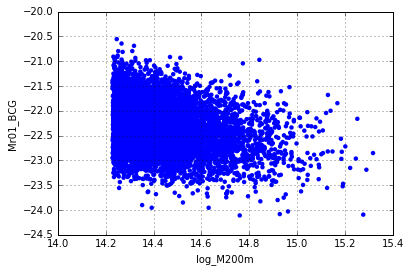

In [113]:
dcen.plot(kind='scatter',x='log_M200m',y='Mr01_BCG', edgecolors='none')

In [165]:
slope,const = np.polyfit(dcen.log_M200m, dcen.Mr01_BCG, 1)
slope,const

(-0.8233928960805631, -10.418171831935126)

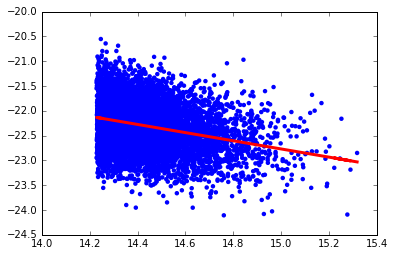

In [178]:
plt.scatter(dcen.log_M200m,dcen.Mr01_BCG, edgecolors='none')
plt.plot(dcen.log_M200m, slope*dcen.log_M200m + const, '-',color='r',lw=3)

In [182]:
classify_fun  = lambda df : df["Mr01_BCG"] < slope*df["log_M200m"] + const

about lambda function : see http://www.secnetix.de/olli/Python/lambda_functions.hawk

In [183]:
classify_fun(dcen)

0     False
1      True
2     False
3      True
4     False
5      True
6      True
7      True
8      True
9     False
10    False
11    False
12    False
13    False
14     True
...
8222     True
8223     True
8224    False
8225     True
8226    False
8227     True
8228     True
8229     True
8230    False
8231    False
8232    False
8233    False
8234    False
8235    False
8236    False
Length: 8237, dtype: bool

In [186]:
dcen["brighterBCG"]=classify_fun(dcen)

In [187]:
dcen.head()

,MEM_MATCH_ID,richness,RA_cen,DEC_cen,Z_LAMBDA,P_CEN1,Mr01_BCG,color_BCG,M200m_h07,log_M200m,brighterBCG
0,2,202.63603,250.082548,46.711531,0.232513,0.996875,-22.849870,1.007128,2.078917e+15,15.317837,False
1,3,165.29185,197.872957,-1.341116,0.182186,0.696332,-23.149490,0.943476,1.668379e+15,15.222295,True
2,5,176.19917,137.300745,10.973595,0.170287,0.758113,-22.160100,0.757124,1.787588e+15,15.252267,False
3,6,190.99649,203.833723,41.001146,0.231596,0.999666,-23.186392,1.109909,1.950251e+15,15.290091,True
4,8,153.39297,150.558906,20.537949,0.324495,0.967910,-22.824154,0.964804,1.539051e+15,15.187253,False


In [188]:
dcen_bright=dcen[dcen["brighterBCG"]==True]
dcen_faint =dcen[dcen["brighterBCG"]==False]

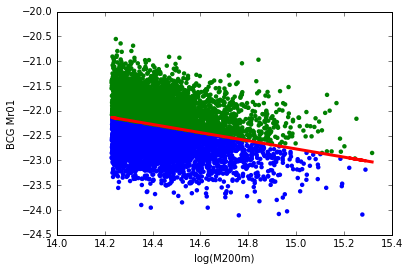

In [192]:
plt.scatter(dcen_bright.log_M200m,dcen_bright.Mr01_BCG, edgecolors='none',color='b')
plt.scatter(dcen_faint.log_M200m,dcen_faint.Mr01_BCG, edgecolors='none',color='g')
plt.plot(dcen.log_M200m, slope*dcen.log_M200m + const, '-',color='r',lw=3)
plt.xlabel("log(M200m)")
plt.ylabel("BCG Mr01")

# 4. DataFrame Merge, join

for more table merge example, see : https://pandas.pydata.org/pandas-docs/stable/merging.html

In [203]:
dcen.head()

,MEM_MATCH_ID,richness,RA_cen,DEC_cen,Z_LAMBDA,P_CEN1,Mr01_BCG,color_BCG,M200m_h07,log_M200m,brighterBCG
0,2,202.63603,250.082548,46.711531,0.232513,0.996875,-22.849870,1.007128,2.078917e+15,15.317837,False
1,3,165.29185,197.872957,-1.341116,0.182186,0.696332,-23.149490,0.943476,1.668379e+15,15.222295,True
2,5,176.19917,137.300745,10.973595,0.170287,0.758113,-22.160100,0.757124,1.787588e+15,15.252267,False
3,6,190.99649,203.833723,41.001146,0.231596,0.999666,-23.186392,1.109909,1.950251e+15,15.290091,True
4,8,153.39297,150.558906,20.537949,0.324495,0.967910,-22.824154,0.964804,1.539051e+15,15.187253,False


In [202]:
dsat

,MEM_MATCH_ID,Index_v5_1,RA,DEC,RA_cen,DEC_cen,Pmem,log_R_R200m,Mr01,color
0,2,227,249.993929,46.792032,250.082548,46.711531,0.775326,-0.375305,-21.072046,1.007469
1,2,228,250.000886,46.786988,250.082548,46.711531,0.809685,-0.406056,-20.853582,0.839453
2,2,229,250.015394,46.777191,250.082548,46.711531,0.856308,-0.474836,-21.234037,0.948816
3,2,231,249.980582,46.758276,250.082548,46.711531,0.756115,-0.454225,-20.297346,0.801052
4,2,232,249.998467,46.740122,250.082548,46.711531,0.815902,-0.570429,-20.621931,0.829359
5,2,233,250.013889,46.733088,250.082548,46.711531,0.891823,-0.664824,-20.625610,0.969452
6,2,235,250.036448,46.728051,250.082548,46.711531,0.760367,-0.826701,-20.779010,1.043093
7,2,236,249.964348,46.779455,250.082548,46.711531,0.668661,-0.354798,-19.547333,0.860037
8,2,237,250.014482,46.785411,250.082548,46.711531,0.755248,-0.437545,-19.571580,0.905006
9,2,239,250.022999,46.753699,250.082548,46.711531,0.796278,-0.610367,-19.121782,0.796604


#### left outer Join

In [204]:
# example: to get richness information for satellites
dsat_with_cen_info = pd.merge(left=dsat, right=dcen[["MEM_MATCH_ID","richness"]], how='left',on="MEM_MATCH_ID")

In [205]:
dsat_with_cen_info

,MEM_MATCH_ID,Index_v5_1,RA,DEC,RA_cen,DEC_cen,Pmem,log_R_R200m,Mr01,color,richness
0,2,227,249.993929,46.792032,250.082548,46.711531,0.775326,-0.375305,-21.072046,1.007469,202.636030
1,2,228,250.000886,46.786988,250.082548,46.711531,0.809685,-0.406056,-20.853582,0.839453,202.636030
2,2,229,250.015394,46.777191,250.082548,46.711531,0.856308,-0.474836,-21.234037,0.948816,202.636030
3,2,231,249.980582,46.758276,250.082548,46.711531,0.756115,-0.454225,-20.297346,0.801052,202.636030
4,2,232,249.998467,46.740122,250.082548,46.711531,0.815902,-0.570429,-20.621931,0.829359,202.636030
5,2,233,250.013889,46.733088,250.082548,46.711531,0.891823,-0.664824,-20.625610,0.969452,202.636030
6,2,235,250.036448,46.728051,250.082548,46.711531,0.760367,-0.826701,-20.779010,1.043093,202.636030
7,2,236,249.964348,46.779455,250.082548,46.711531,0.668661,-0.354798,-19.547333,0.860037,202.636030
8,2,237,250.014482,46.785411,250.082548,46.711531,0.755248,-0.437545,-19.571580,0.905006,202.636030
9,2,239,250.022999,46.753699,250.082548,46.711531,0.796278,-0.610367,-19.121782,0.796604,202.636030
